# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [8]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
# Import essential libraries

import os
import zipfile

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import random
from random import randint

import matplotlib.pyplot as plt
import PIL
from PIL import Image

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


2025-04-23 16:02:16.390322: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"sklearn version: {sklearn.__version__}")

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.8.4
PIL version: 10.3.0
tensorflow version: 2.16.2
keras version: 3.9.0
sklearn version: 1.4.2


Load the dataset.

In [12]:
# Function to Load and unzip the dataset

def unzip_data(zip_file_path, extract_file_path):
    if not os.path.exists(extract_file_path):
        os.makedirs(extract_file_path)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_file_path)
    print(f'Dataset extracted to {extract_file_path}')


In [13]:
# Define the path to the zip file and extract file
zip_file_path = 'data.zip'
extract_file_path = 'folder/'

In [14]:
# unzip the dataset and Extract

unzip_data(zip_file_path, extract_file_path)

Dataset extracted to folder/


In [15]:
extract_file_path

'folder/'

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [20]:
# Create a function to load the raw images

def loadImages(extract_file_path):
    images = []
    labels = []
    # Check for all sub-folders / sub-directories
    for root, dirs, files in os.walk(extract_file_path):
        # As this is nested structure, Skip the root directory
        if root == extract_file_path:
            continue
            
        # Get the label names from the folder name
        label = os.path.basename(root)
        
        # Processing all images in the sub-directories
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Create full file path
                file_path = os.path.join(root, file)
                images.append(file_path)
                labels.append(label)
                
    return images, labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

In [22]:
# Loading images and their labels

image_paths, labels = loadImages(extract_file_path)

# Print some information to verify the loading

print(f"Total number of images found: {len(image_paths)}")
print(f"Total number of labels found: {len(labels)}")
print("\nUnique labels:", set(labels))

Total number of images found: 7625
Total number of labels found: 7625

Unique labels: {'Glass', 'Other', 'Paper', 'Cardboard', 'Plastic', 'Food_Waste', 'Metal'}


Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [24]:
# Function to convert to Numpy array for further processing and normalize the images

def preprocess_image(image_path):
    # Load image
    img = PIL.Image.open(image_path)
    # Convert to numpy array and normalize
    img_array = np.array(img) / 255.0
    return img_array

# Convert all images to numpy arrays
X = []
y = []

# Process each image
for image_path, label in zip(image_paths, labels):
    try:
        # Preprocess the image
        img_array = preprocess_image(image_path)
        X.append(img_array)
        y.append(label)
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print the shapes to verify
print("Image array shape:", X.shape)
print("Labels array shape:", y.shape)

Image array shape: (7625, 256, 256, 3)
Labels array shape: (7625,)


In [25]:
# Created a function to Display the different random images and its labels

def show_images_with_labels(images, labels, num_images):
    plt.figure(figsize=(15, 15))
    indices = list(range(len(images)))
    random.shuffle(indices)
    for i in range(num_images):
        idx = indices[i]
        random_integer = randint(1, num_images)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

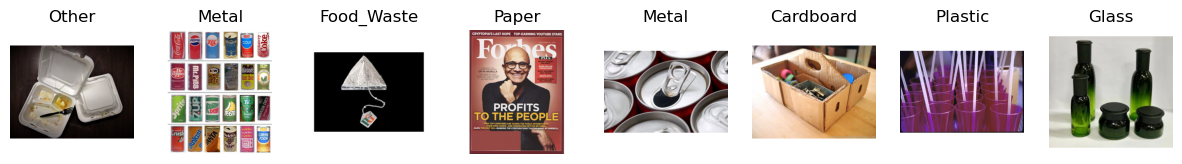

In [27]:
# Display the different random images and its labels

show_images_with_labels(X,y ,8)

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

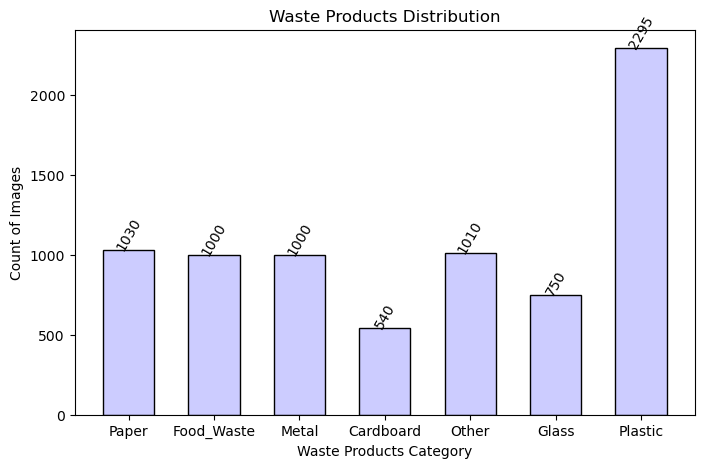

In [30]:
# Visualise Data Distribution

plt.figure(figsize=[8,5])
ax = sns.histplot(data=y, bins=7, color="blue", alpha=0.2, legend=True, shrink=0.6)


# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., 
            height + 1.5, 
            f'{int(height)}', 
            ha="center", 
            rotation=60
           ) 
plt.title("Waste Products Distribution")
plt.xlabel("Waste Products Category")
plt.ylabel("Count of Images")
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

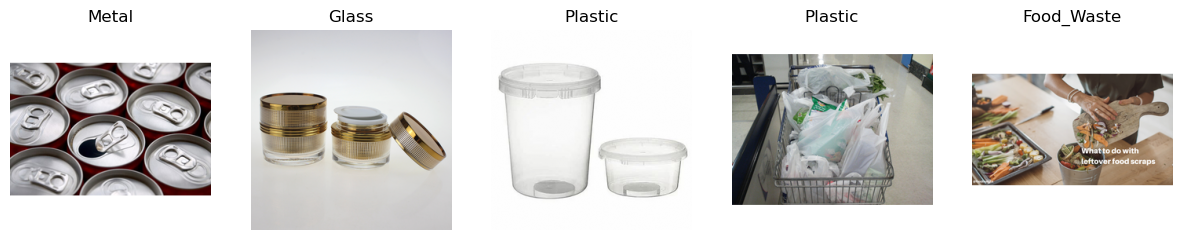

In [32]:
# Visualise Sample Images (across different labels)

show_images_with_labels(X,y ,5)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [34]:
# Find the smallest and largest image dimensions from the data set

width_list , height_list  = [] , []
for i in range(0, len(X)):
    w, h ,c = X[i].shape
    width_list.append(w)
    height_list.append(h)

width_list.sort()
height_list.sort()

width_list[0], width_list[-1], height_list[0], height_list[-1]

print(f'Smallest image dimensions: {width_list[0]}x{height_list[0]}')
print(f'Largest image dimensions: {width_list[-1]}x{height_list[-1]}')

Smallest image dimensions: 256x256
Largest image dimensions: 256x256


In [35]:
# Resize the image dimensions

def resize_images_to_224(images):
    resized_images = []
    for img in images:
        img_resized = PIL.Image.fromarray((img * 255).astype(np.uint8)).resize((224,224))
        img_resized = np.array(img_resized) / 255.0
        resized_images.append(img_resized)
    return np.array(resized_images)

# Resize images to 224 x 224

X_resized = resize_images_to_224(X)

# Print the shape to verify
print("resized image array shape:", X_resized.shape)

resized image array shape: (7625, 224, 224, 3)


##### **Note** After resizing, did not used the resized image, as it was throwing error, which could not resolve as the model is running really long. 

In [36]:
X.shape, X_resized.shape

((7625, 256, 256, 3), (7625, 224, 224, 3))

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [40]:
# Encode the labels suitably

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([5, 5, 5, ..., 6, 6, 6])

In [41]:
# Verifying the encoding / print class mapping
print("\nClass mapping:\n")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")


Class mapping:

Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6


In [42]:
# Sample disply of first few encoded labels:

print(f'Image path: {image_paths[3202]}, Encoded label: {y[3202]}')
print(f'Image path: {image_paths[2026]}, Encoded label: {y[2026]}')
print(f'Image path: {image_paths[5000]}, Encoded label: {y[5000]}')
print(f'Image path: {image_paths[20]}, Encoded label: {y[20]}')

Image path: folder/data/Cardboard/file_105.png, Encoded label: 0
Image path: folder/data/Food_Waste/file_544.png, Encoded label: 1
Image path: folder/data/Glass/file_332.png, Encoded label: 2
Image path: folder/data/Paper/file_824.png, Encoded label: 5


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [45]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

# Print the shapes of training and test sets
print("Training set shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (5337, 256, 256, 3)
Training labels shape: (5337,)
Test set shape: (2288, 256, 256, 3)
Test labels shape: (2288,)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [50]:
# Parameters for Model Building

batch_size = 32
num_classes = 7
epochs = 10

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [5]:
# define model configuration

# Recommended Model Configuration
conf =[
    { "name" : "conf", "filters" : 32, "kernel_size" : (3,3), "activation" : "relu", "pool_size" : (2,2), "dropout_rate" : 0.3, "activation": "relu", "conv_layers" : 3 , "batch_norm": "N" }
    ]

# Other configuration tried for model building
'''
conf_2 = [
        { "name": "conf3_updated_1", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 3, "batch_norm": "N" },
        { "name": "conf3_updated_2", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 2, "batch_norm": "N" },
        { "name": "conf3_updated_3", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 1, "batch_norm": "N" }
]


conf_3 = [
        { "name": "conf3_updated_1", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 3, "batch_norm": "N" },
        { "name": "conf3_updated_2", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 2, "batch_norm": "N" },
        { "name": "conf3_updated_3", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 1, "batch_norm": "N" }
]

conf_4 =[
    { "name" : "conf", "filters" : 32, "kernel_size" : (3,3), "activation" : "relu", "pool_size" : (2,2), "dropout_rate" : 0.4, "activation": "relu", "conv_layers" : 3 , "batch_norm": "N" }
    ]

conf_5 =[
    { "name" : "conf", "filters" : 32, "kernel_size" : (3,3), "activation" : "relu", "pool_size" : (2,2), "dropout_rate" : 0.2, "activation": "relu", "conv_layers" : 3 , "batch_norm": "N" }
    ]


'''

'\nconf_2 = [\n        { "name": "conf3_updated_1", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 3, "batch_norm": "N" },\n        { "name": "conf3_updated_2", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 2, "batch_norm": "N" },\n        { "name": "conf3_updated_3", "filters": 32, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.3, "conv_layers": 1, "batch_norm": "N" }\n]\n\n\nconf_3 = [\n        { "name": "conf3_updated_1", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 3, "batch_norm": "N" },\n        { "name": "conf3_updated_2", "filters": 64, "kernel_size": (3,3), "activation": "relu", "pool_size": (2,2), "dropout_rate": 0.4, "conv_layers": 2, "batch_norm": "N" },\n        { "name": "conf3_updated_3", "filters": 64, "kernel_size": (3,3), "activat

In [52]:
# define a method/function for model creation

def create_model(conf, input_shape):
    model = Sequential()
    for i in range(conf["conv_layers"]):
        model.add(Conv2D(conf["filters"], conf["kernel_size"], activation=conf["activation"], padding='same', input_shape=(width_list[0], width_list[0], 3) ))
        if conf["batch_norm"] == "Y":
            model.add(BatchNormalization())
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=conf["pool_size"]))
        model.add(Dropout(conf["dropout_rate"]))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(conf["dropout_rate"]))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model 

In [53]:
# compile the model (Function Definition)
def compile_model(model):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

In [55]:
# Training

def model_training(config, X_train, y_train, epochs, batch_size, X_test, y_test):
    history_dict = {}
    for config in config:
        print(f"\nTraining with configuration: {config['name']}")
        
        # Create the model
        model = create_model(config, input_shape=(width_list[0], width_list[0], 3))
        
        # Compile the model
        model = compile_model(model)
        
        # Print the model summary
        print(config)
        model.summary()
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

        history_dict[config['name']] = history.history
    return history_dict, model

In [56]:
# train the model

model_history, model = model_training(config=conf, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history


Training with configuration: conf


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{'name': 'conf', 'filters': 32, 'kernel_size': (3, 3), 'activation': 'relu', 'pool_size': (2, 2), 'dropout_rate': 0.3, 'conv_layers': 3, 'batch_norm': 'N'}


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,801,095 (64.09 MB)

 Trainable params: 16,800,903 (64.09 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.2539 - loss: 10.8664 - val_accuracy: 0.1674 - val_loss: 2.5899
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.3293 - loss: 1.7557 - val_accuracy: 0.2273 - val_loss: 2.9298
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 588s 4s/step - accuracy: 0.3485 - loss: 1.6619 - val_accuracy: 0.3278 - val_loss: 2.0082
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 591s 4s/step - accuracy: 0.3750 - loss: 1.5735 - val_accuracy: 0.3597 - val_loss: 1.8182
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 586s 4s/step - accuracy: 0.4040 - loss: 1.5396 - val_accuracy: 0.3588 - val_loss: 1.8136
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 605s 4s/step - accuracy: 0.4252 - loss: 1.4513 - val_accuracy: 0.4030 - val_loss: 2.5423
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 584s 3s/step - accuracy: 0.4363 - loss: 1.4390 - val_accuracy: 0.3864 - val_loss: 3.7772
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.4585 - loss: 1.4128 - val_acc

{'conf': {'accuracy': [0.2744987905025482,
   0.3382049798965454,
   0.3580663204193115,
   0.3831740617752075,
   0.4049091339111328,
   0.41952407360076904,
   0.43844857811927795,
   0.45137718319892883,
   0.4680532217025757,
   0.4884766638278961],
  'loss': [4.721245765686035,
   1.7324293851852417,
   1.659327507019043,
   1.5690878629684448,
   1.535571813583374,
   1.4895259141921997,
   1.4309457540512085,
   1.4045166969299316,
   1.33226478099823,
   1.2641832828521729],
  'val_accuracy': [0.16739509999752045,
   0.22727273404598236,
   0.32779720425605774,
   0.35970279574394226,
   0.35882866382598877,
   0.4029720425605774,
   0.3863636255264282,
   0.3881118893623352,
   0.38680070638656616,
   0.4597901999950409],
  'val_loss': [2.589890956878662,
   2.929802656173706,
   2.0082180500030518,
   1.8181684017181396,
   1.8135732412338257,
   2.542330026626587,
   3.777198553085327,
   2.6810922622680664,
   2.833395481109619,
   1.4790425300598145]}}

In [7]:
# Other training Parameters used for Model training
'''

model_history_2 = model_training(config=conf_2, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history_2
model_history_3 = model_training(config=conf_3, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history_3
model_history_4 = model_training(config=conf_4, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history_4
model_history_5 = model_training(config=conf_5, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)
model_history_5


'''

'\n\nmodel_history_2 = model_training(config=conf_2, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)\nmodel_history_2\nmodel_history_3 = model_training(config=conf_3, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)\nmodel_history_3\nmodel_history_4 = model_training(config=conf_4, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)\nmodel_history_4\nmodel_history_5 = model_training(config=conf_5, X_train=X_train, y_train=y_train, epochs=epochs, batch_size=batch_size, X_test=X_test, y_test=y_test)\nmodel_history_5\n\n\n'

Use appropriate metrics and callbacks as needed.

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [61]:
# Evaluate on the test set; display suitable metrics

accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test accuracy: {accuracy:.2f}")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

Test accuracy: 0.46
72/72 ━━━━━━━━━━━━━━━━━━━━ 49s 666ms/step
              precision    recall  f1-score   support

   Cardboard       0.67      0.60      0.64       162
  Food_Waste       0.54      0.51      0.52       300
       Glass       0.45      0.28      0.34       225
       Metal       0.32      0.07      0.12       300
       Other       0.63      0.13      0.21       303
       Paper       0.75      0.23      0.36       309
     Plastic       0.41      0.88      0.56       689

    accuracy                           0.46      2288
   macro avg       0.54      0.39      0.39      2288
weighted avg       0.51      0.46      0.41      2288



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [65]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [68]:
# Create a function to augment the images




In [69]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [71]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

#### Data Findings

1. There are in all 7625 images given in the dataset which belongs to 7 waste segregation classes.

   ***Class mapping:***

       Cardboard: 0
       Food_Waste: 1
       Glass: 2
       Metal: 3
       Other: 4
       Paper: 5
       Plastic: 6

   
2. The number of images of each class is not balanced. Below is the distribution.
   
       Cardboard: 540 images
       Food_Waste: 1000 images
       Glass: 750 images
       Metal: 1000 images
       Other: 1010 images
       Paper: 1030 images
       Plastic: 2295 images
   
3. The number of images pertaining to plastic are more than 2x of the volume of other classes.

4. This distribution could potentially lead to class imbalance.

5. All images are of uniform size 256 x 256.

6. Data set partitioned into training, and test sets for model development and evaluation.
   
       Training set shape: (5337, 256, 256, 3)
       Training labels shape: (5337,)
       Test set shape: (2288, 256, 256, 3)
       Test labels shape: (2288,)

#### Model Training Results

1. Tried Creating models with different combination of conv layers, batch size, no of filters, batch normaliation, pooling and dropouts.

2. Not all the models executed, few got stuck for very long time, due to resource constraint. Did not included data augmentation being option and resource constraint.

3. **Batch normalization** did not showed any significant contribution towards improving the accuracy.

4. Adding **Drop out layer** helped in improving the accuracy

5. **Overall Accuracy**: The model has an overall accuracy of 46%, indicating that it correctly classifies waste products less than half the time.

6. Class Performance:

   **Plastic** : This class has the highest recall (0.88), meaning the model is good at identifying plastic waste. It also has a relatively                   high f1-score (0.56), indicating a balance between precision and recall.  
   **Paper**: Despite having the highest precision (0.75), the recall is quite low (0.23), suggesting that while the model is accurate when                it predicts paper, it often misses paper items.  
   **Metal**: This class has the lowest precision (0.32) and recall (0.07), indicating poor performance in identifying metal waste.  

8. **Class Imbalance**: The precision, recall & f1-score vary significantly across different classes, with Plastic having the highest number of instances (689) and Cardboard the lowest (162). This imbalance can affect the model's performance, as it may be biased towards classes with more instances.

9. These insights suggest areas for improvement, such as addressing class imbalance and enhancing the model's ability to identify certain classes like Glass, Metals etc. 






